In [1]:
%pylab inline
import seaborn as sns
import xarray as xr
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy
import matplotlib.patches as mpatches

Populating the interactive namespace from numpy and matplotlib


# 1. Generic plotting


In [2]:
rcParams['savefig.dpi'] = 300
rcParams['figure.figsize'] = [10, 12]
rcParams['font.size'] = 12
rcParams['font.family'] = 'Arial'
sns.set_style("white")

# 2. Load Files


In [3]:

pathx1 = '/mnt/lustre/groups/erth0834/SARAH/DWHITT/'
xmc = xr.open_mfdataset(pathx1 + 'XMXL-monmean_CTRL.nc', decode_times=False)
xmlp = xr.open_mfdataset(pathx1 + 'XMXL-monmean_LP.nc', decode_times=False)
lon = xmc.TLONG.values
lat = xmc.TLAT.values



# 3. define arbitary boxes (indices): 


In [4]:
lo1 = 800
lo2 = 1700
lo3 = 3100
la1 = 1155 + 690 
la2 = 1155 + 500 
la3 = 1155 + 300 
la4 = 1155 
la5 = 1155 - 300 
la6 = 1155 - 520 
la7 = 1155 - 730 
lons = [lo1,lo2,lo3]
lats = [la1,la2,la3,la4,la5,la6,la7]
width = 50
k=0

latts = np.zeros((21))
longs = np.zeros((21))

for lo in range(np.size(lons)):
    for la in range(np.size(lats)):
        # Adds the boxes used in averaging:
        
        width1 = np.abs(lon[lats[la],lons[lo]] - lon[lats[la]+50,lons[lo] + 50])
        height1 = np.abs(lat[lats[la],lons[lo]] - lat[lats[la] + 50,lons[lo] + 50])       
        xy=(lon[lats[la],lons[lo]],lat[lats[la],lons[lo]])
        longs[k] = lon[lats[la],lons[lo]]
        latts[k] = lat[lats[la],lons[lo]]
        #test[k,:] = [longs,latts,width1,height1]
        
        k=k+1

In [58]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


# LOAD OBS:

In [57]:
import scipy.io
mat = scipy.io.loadmat('MonthlyClimatology_ARGO_MLDbmax_TEOS10_Copernicus_PF_2000-2017_all_jun252019.mat')
mld_o_m = mat['OBSMLDm']
mld_o = mat['OBSMLDg']
lon_o = mat['X']
lat_o= mat['Y']
idy = (np.abs(lat_o + lat[lats[la],lons[lo]])).argmin()
idx = (np.abs(lon_o - lon[lats[la],lons[lo]])).argmin()


In [59]:
# find nearest location to compare 
LON_idx = np.zeros((np.size(longs_m)))
LAT_idx = np.zeros((np.size(longs_m)))
longs_m = ((longs - 180) % 360) - 180

for i in range(21):
    LON_idx[i] = (np.abs(lon_o[0,:] - longs_m[i])).argmin()
    LAT_idx[i] = (np.abs(lat_o[:,0] - latts[i])).argmin()

# 4. PLOTTING


In [78]:
# 4.1 Setup plotting: 
#-------------------------
sns.set_style("white")
tits = ['(A) N Atlantic Polar','(C) N Atlantic Subpolar','(E) N Atlantic Subtropical','(G) Atlantic Equator','(J) S Atlantic Subtropical','(M) S Atlantic Subpolar','(P) S Atlantic Polar']
tits1 = ['(H) Indian Equator','(K) S Indian Subtropical','(N) S Indian Subpolar','(Q) S Indian Polar']
tits2 = ['(B) N Pacific Polar','(D) N Pacific SubPolar','(F) N Pacific Subtropical','(I) Pacific Equator','(L) S Pacific Subtropical','(O) S Pacific Subpolar','(R) S Pacific Polar']
axist = ['gs[0,0]','gs[1, 0]','gs[2,0]','gs[3,0]','gs[4,0]','gs[5,0]','gs[6,0]','gs[1:3,1]','gs[3,1]','gs[3,1]','gs[3,1]','gs[4,1]','gs[5,1]','gs[6,1]','gs[0,2]','gs[1, 2]','gs[2,2]','gs[3,2]','gs[4,2]','gs[5,2]','gs[6,2]']   #'gs[4:8,2:4]','gs[8:10,2:4]','gs[2:4,5:7]', 'gs']
month = np.arange(0,12,1)
monthstr = ['J','F','M','A','M','J','J','A','S','O','N','D']
gs = gridspec.GridSpec(7,3)

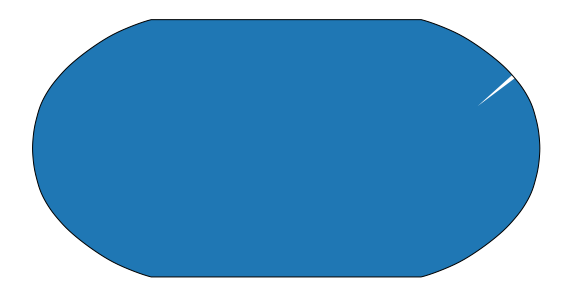

In [79]:
ax = plt.subplot(111, projection=ccrs.Robinson(central_longitude=40))
ax.coastlines(resolution='10m');
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','10m',edgecolor='face',facecolor='k'))
ax.gridlines()
plt.savefig('world_map.pdf')
i=0
for lo in range(np.size(lons)):
    for la in range(np.size(lats)):
        # Adds the boxes used in averaging:
        width1 = np.abs(lon[lats[la],lons[lo]] - lon[lats[la]+50,lons[lo] + 50])
        height1 = np.round(np.abs(lat[lats[la],lons[lo]] - lat[lats[la] + 50,lons[lo] + 50]))
        ax.add_patch(mpatches.Rectangle(xy=(lon[lats[la],lons[lo]],lat[lats[la],lons[lo]]), width=width1,height=height1,lw=1,transform=ccrs.PlateCarree()))

i=0; ii=0 ; n = 0; m = 0; l=0
plt.show()

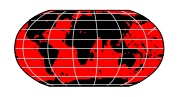

In [80]:
# 4.1: Plot the central global map:
#---------------------------------------------

ax = plt.subplot(gs[1:3,1], projection=ccrs.Robinson(central_longitude=40))
ax.coastlines(resolution='10m');
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','10m',edgecolor='face',facecolor='k'))
ax.gridlines()
plt.savefig('world_map.pdf')
i=0
for lo in range(np.size(lons)):
    for la in range(np.size(lats)):
        # Adds the boxes used in averaging:
        width1 = np.abs(lon[lats[la],lons[lo]] - lon[lats[la]+50,lons[lo] + 50])
        height1 = np.round(np.abs(lat[lats[la],lons[lo]] - lat[lats[la] + 50,lons[lo] + 50]))
        ax.add_patch(mpatches.Rectangle(xy=(lon[lats[la],lons[lo]],lat[lats[la],lons[lo]]), width=width1,height=height1,facecolor='r',lw=1,transform=ccrs.PlateCarree()))

i=0; ii=0 ; n = 0; m = 0; l=0



0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]
0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]
0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]
0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]
0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 

/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:18: RuntimeWarning: Mean of empty slice
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: Mean of empty slice
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:20: RuntimeWarning: Mean of empty slice
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: Mean of empty slice
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]

0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]
0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]
0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[ 7 19 31 43 55]
8
[ 8 20 32 44 56]
9
[ 9 21 33 45 57]
10
[10 22 34 46 58]
11
[11 23 35 47 59]
0
[ 0 12 24 36 48]
1
[ 1 13 25 37 49]
2
[ 2 14 26 38 50]
3
[ 3 15 27 39 51]
4
[ 4 16 28 40 52]
5
[ 5 17 29 41 53]
6
[ 6 18 30 42 54]
7
[

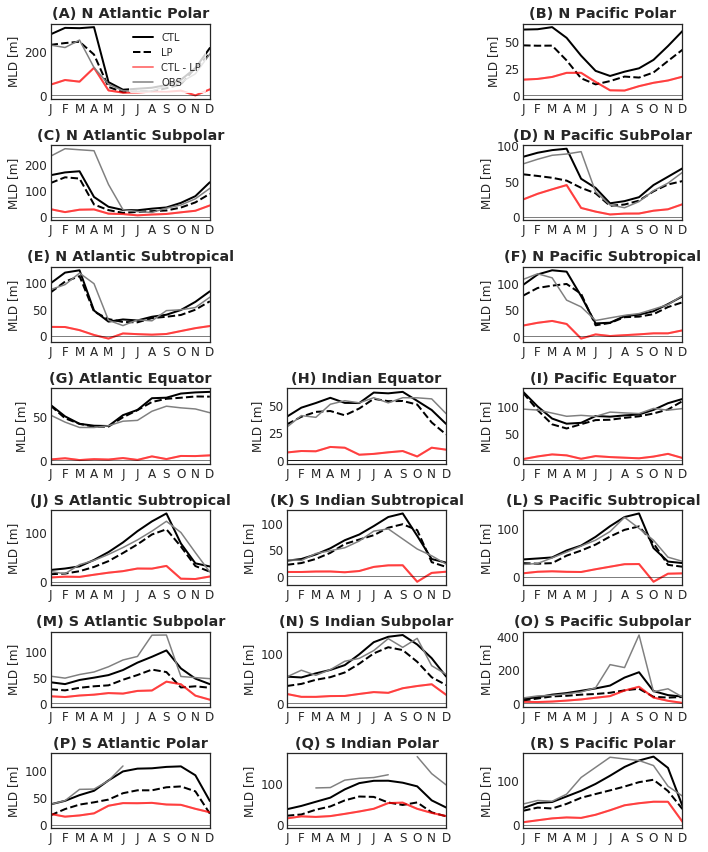

In [115]:
# 4.2: Plot the seasonal cycles averaged in each box:
#------------------------------------------------------

i=0; ii=0 ; n = 0; m = 0; l=0

for lo in range(np.size(lons)):
 
    for la in range(np.size(lats)):
        XC=np.zeros(12)
        XLP=np.zeros(12)
        diffseas=np.zeros(12)
        diffstderr=np.zeros(12)
        
        for moidx in range(12):
            print(moidx)
            a=np.arange(60)
            print(a[moidx:(49+moidx):12])
            XC[moidx] = np.nanmean(np.nanmean(np.nanmean(xmc.XMXL[moidx:(49+moidx):12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2,1),1),0)
            XLP[moidx] = np.nanmean(np.nanmean(np.nanmean(xmlp.XMXL[moidx:(49+moidx):12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2,1),1),0)
            diffseas[moidx]=np.nanmean(np.nanmean(np.nanmean(xmc.XMXL[moidx:(49+moidx):12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2,1),1),0)-  \
            np.nanmean(np.nanmean(np.nanmean(xmlp.XMXL[moidx:(49+moidx):12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2,1),1),0)
          #  XCstderr[moidx] = 0.5*np.nanstd(np.nanmean(np.nanmean(xmc.XMXL[moidx:59:12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2,1),1),0)
          #  XLPstderr[moidx] = 0.5*np.nanstd(np.nanmean(np.nanmean(xmlp.XMXL[moidx:59:12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2,1),1),0)
            # std err is just 0.5 * std (normalized by 1/N) we want +/- 2 std errors
            diffstderr[moidx] = np.nanstd(np.nanmean(np.nanmean(xmc.XMXL[moidx:(49+moidx):12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2 - \
                                                                    xmlp.XMXL[moidx:(49+moidx):12,lats[la]:lats[la] + width,lons[lo]:lons[lo] + width]/1e2,1),1),0)
        if ii ==7:
            print('')
        
        else: 
            ax = plt.subplot(eval(axist[ii]))
            plt.plot(month, XC,'k',lw=2,label='CTL')
            plt.plot(month, XLP,'--k',lw=2,label='LP')
            plt.plot(month, diffseas+diffstderr,'-r',lw=2,alpha=.5,label='CTL - LP')
            plt.plot(month, diffseas-diffstderr,'-r',lw=2,alpha=.5)
            plt.plot(month,np.zeros(12),'-k',lw=.5)
            plt.plot(month,mld_o[int(LAT_idx[ii]),int(LON_idx[ii])],color='grey',label='OBS')
            plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['J','F','M','A','M','J','J','A','S','O','N','D'])
            plt.ylabel(r'MLD [m]')
            plt.xlim(0,11)
            
            plt.tight_layout()

            if ii==0:
                legend = plt.legend(frameon = 1,fontsize=10,loc=1)
                frame = legend.get_frame()
                frame.set_color('white')
                

            if ii < 7:
                plt.title(tits[n],fontweight='bold')
                n=n+1
            if (ii > 9) & (ii < 14):
            
                plt.title(tits1[m],fontweight='bold')
                m=m+1
            
            if  (ii > 13):
                plt.title(tits2[l],fontweight='bold')
                l=l+1
                
        ii = ii + 1;
        
        i=i+1
    i=0
    
plt.tight_layout()
plt.savefig('Figure13_seasonal.pdf')
plt.savefig('Figure13_seasonal.png',dpi=300)
